In [2]:
import pandas as pd

In [3]:
df = pd.read_excel(r'datasets\combined_students_data.xlsx')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28403 entries, 0 to 28402
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 28403 non-null  object 
 1   Age                                    28403 non-null  int64  
 2   City                                   28403 non-null  object 
 3   Academic Pressure                      28403 non-null  int64  
 4   CGPA                                   28403 non-null  float64
 5   Study Satisfaction                     28403 non-null  int64  
 6   Sleep Duration                         28403 non-null  float64
 7   Unnamed: 7                             28403 non-null  object 
 8   Degree                                 28403 non-null  object 
 9   Have you ever had suicidal thoughts ?  28403 non-null  int64  
 10  Work/Study Hours                       28403 non-null  int64  
 11  Fi

In [5]:
df

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Unnamed: 7,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,M,28,Varanasi,2,6.51,4,7.5,1,BA,1,9,2,1,0
1,M,28,Bangalore,4,7.48,5,5.5,2,MD,1,7,1,1,0
2,M,25,Rajkot,1,7.21,3,5.5,0,MBBS,1,10,4,0,1
3,M,23,Mumbai,1,9.90,4,9.0,0,MSc,1,7,2,1,0
4,F,31,Vadodara,1,5.97,5,9.0,2,LLM,1,4,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28398,F,27,Surat,5,5.75,5,5.5,0,'Class 12',1,7,1,1,0
28399,M,27,Ludhiana,2,9.40,3,4.5,2,MSc,0,0,3,1,0
28400,M,31,Faridabad,3,6.61,4,5.5,0,MD,0,12,2,0,0
28401,F,18,Ludhiana,5,6.88,2,4.5,2,'Class 12',1,10,5,0,1


In [6]:
df.describe()

,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Have you ever had suicidal thoughts ?,Work/Study Hours,Family History of Mental Illness,Depression
count,28403.000000,28403.000000,28403.000000,28403.000000,28403.000000,28403.000000,28403.000000,28403.000000,28403.000000
mean,25.829701,3.138788,7.654544,2.946168,6.490501,0.630778,7.143682,0.483752,0.584023
std,4.905749,1.381710,1.470633,1.361454,1.740958,0.482603,3.709519,0.499745,0.492898
min,18.000000,0.000000,0.000000,0.000000,4.500000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,6.280000,2.000000,4.500000,0.000000,4.000000,0.000000,0.000000
50%,26.000000,3.000000,7.770000,3.000000,5.500000,1.000000,8.000000,0.000000,1.000000
75%,30.000000,4.000000,8.920000,4.000000,7.500000,1.000000,10.000000,1.000000,1.000000
max,59.000000,5.000000,10.000000,5.000000,9.000000,1.000000,12.000000,1.000000,1.000000


In [7]:
df['Depression'].value_counts()

Depression
1    16588
0    11815
Name: count, dtype: int64

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

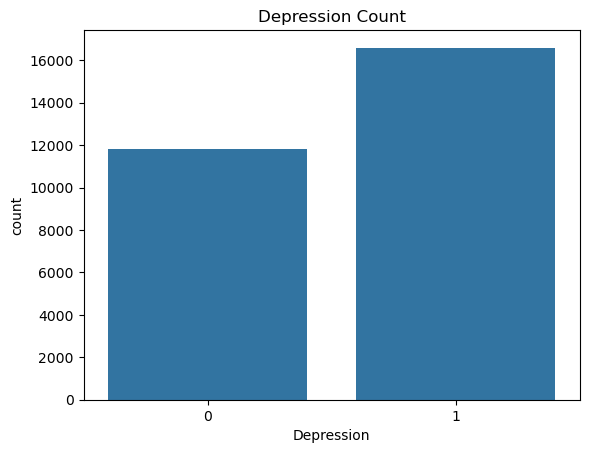

In [9]:
sns.countplot(data=df, x='Depression')
plt.title('Depression Count')
plt.show()

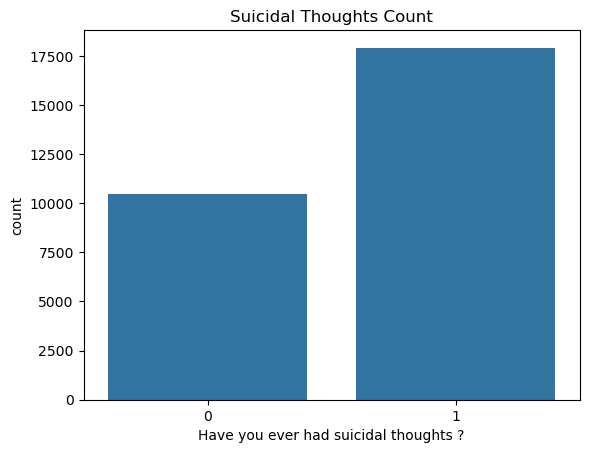

In [10]:
sns.countplot(data=df, x='Have you ever had suicidal thoughts ?')
plt.title('Suicidal Thoughts Count')
plt.show()

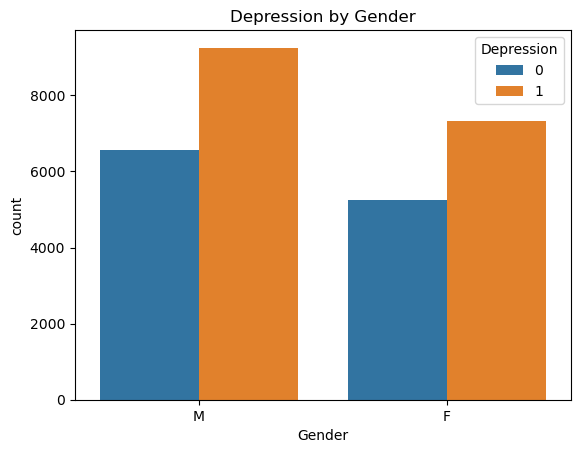

In [11]:
sns.countplot(data=df, x='Gender', hue='Depression')
plt.title('Depression by Gender')
plt.show()


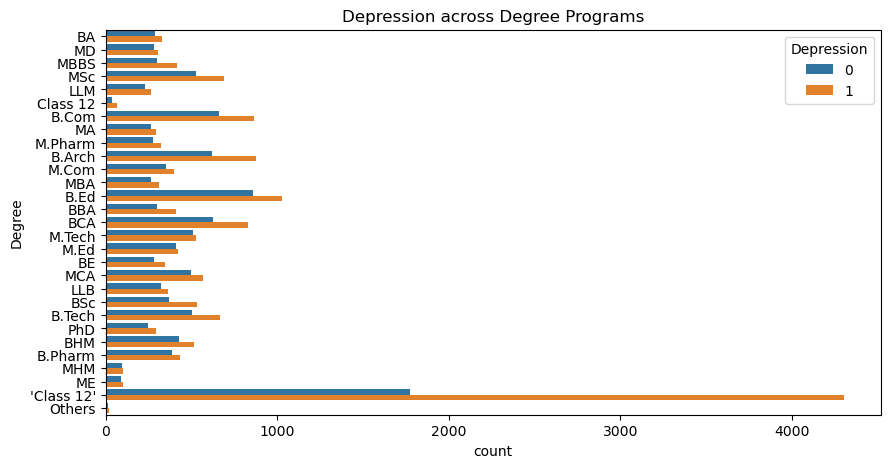

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='Degree', hue='Depression')
plt.title('Depression across Degree Programs')
plt.show()


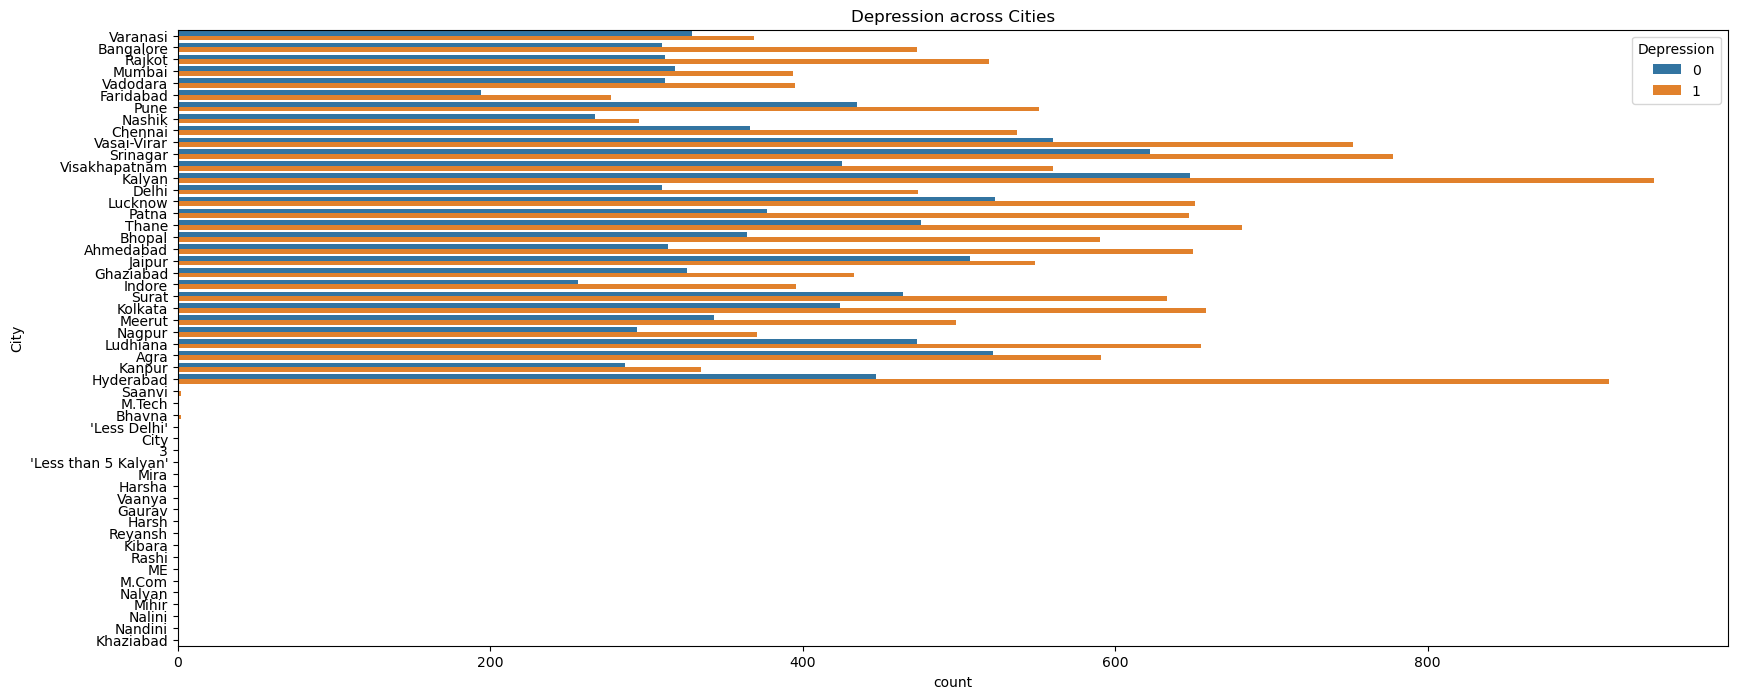

In [13]:
plt.figure(figsize=(20,8))
sns.countplot(data=df, y='City', hue='Depression')
plt.title('Depression across Cities')
plt.show()


In [15]:
import pandas as pd
import cufflinks as cf
from plotly.offline import iplot
cf.go_offline()
cf.set_config_file(world_readable=True, theme='pearl')  # other: solar, white, dark

# Assuming your DataFrame is already cleaned and ready


In [16]:
# Group by City and Depression status (0/1), and count
grouped = df.groupby(['City', 'Depression']).size().unstack(fill_value=0)


In [17]:
grouped.iplot(
    kind='bar',
    barmode='stack',  # or 'group'
    orientation='h',
    title='🧠 Depression across Cities (Interactive)',
    xTitle='Number of Students',
    yTitle='City',
    colors=['#636EFA', '#EF553B'],  # Custom colors for 0 and 1
    width=0.8,
    theme='pearl'
)


In [18]:
df.groupby(['Gender', 'Depression']).size().unstack().iplot(kind='bar', barmode='group' , colors=["#0FD113", "#FF2600"])


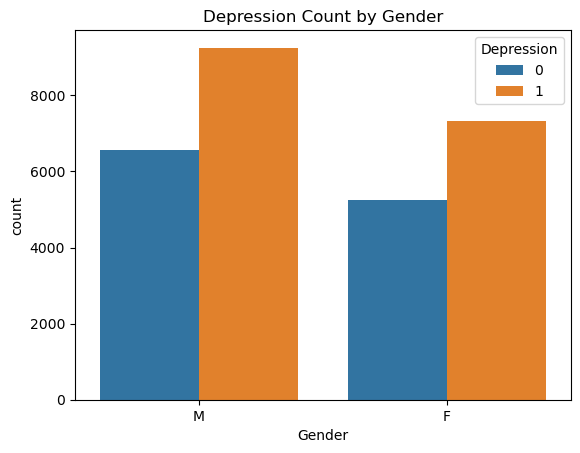

In [19]:
sns.countplot(data=df, x='Gender', hue='Depression')
plt.title("Depression Count by Gender")
plt.show()


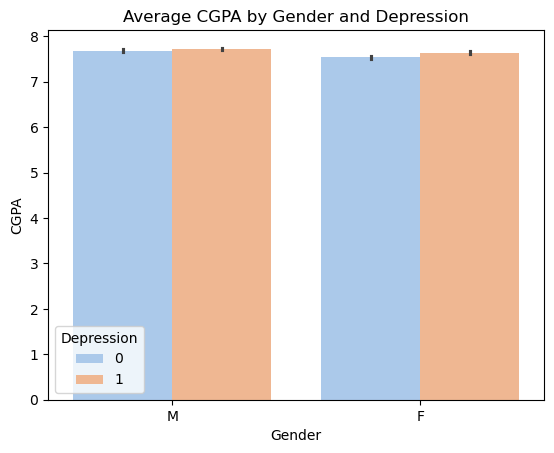

In [20]:
sns.barplot(data=df, x='Gender', y='CGPA', hue='Depression', palette='pastel')
plt.title("Average CGPA by Gender and Depression")
plt.show()


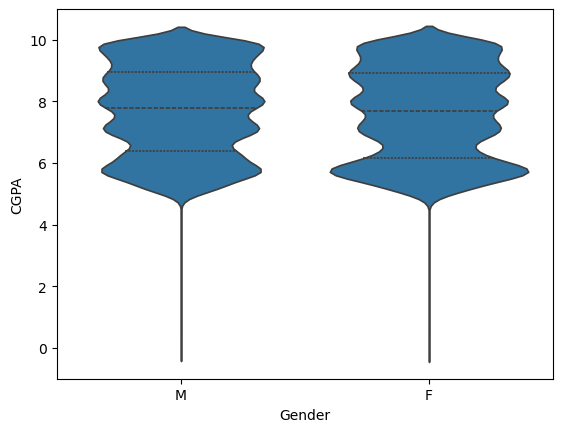

In [21]:
sns.violinplot(data=df, x='Gender', y='CGPA', inner="quartile")
plt.show()

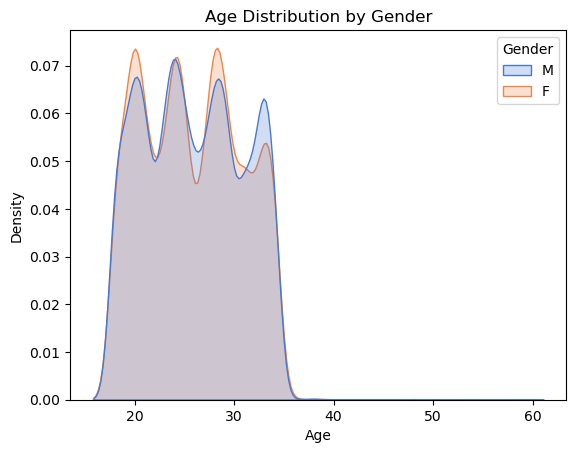

In [22]:
# ...existing code...

sns.kdeplot(data=df, x='Age', hue='Gender', fill=True, common_norm=False, palette='muted')
plt.title('Age Distribution by Gender')
plt.show()
# ...existing code...

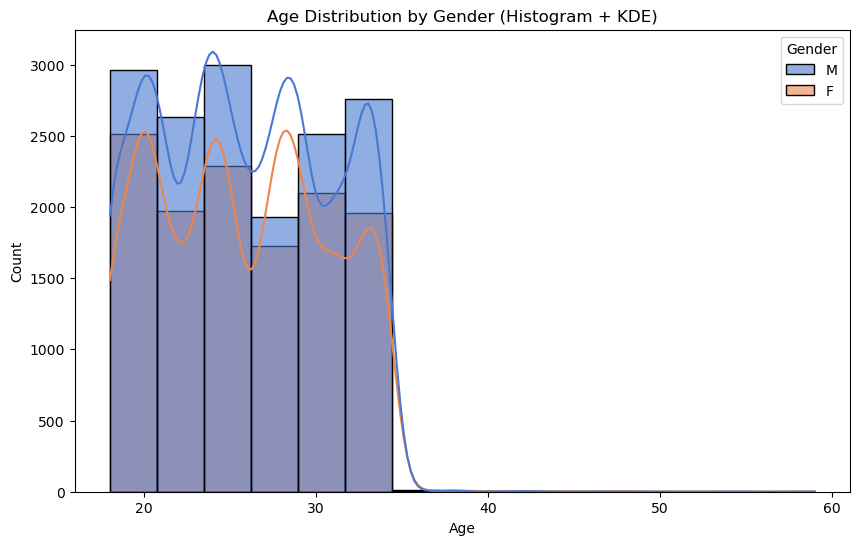

In [23]:
# ...existing code...

plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Age', hue='Gender', bins=15, kde=True, palette='muted', alpha=0.6)
plt.title('Age Distribution by Gender (Histogram + KDE)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
# ...existing code...

In [24]:
# ...existing code...

import cufflinks as cf
from plotly.offline import iplot
cf.go_offline()
cf.set_config_file(world_readable=True, theme='pearl')

# Group ages by gender and count
age_gender_counts = df.groupby(['Age', 'Gender']).size().reset_index(name='Count')

# Pivot for plotting
pivot_df = age_gender_counts.pivot(index='Age', columns='Gender', values='Count').fillna(0)

# Interactive bar plot
pivot_df.iplot(
    kind='bar',
    barmode='group',
    title='Interactive Age Distribution by Gender',
    xTitle='Age',
    yTitle='Number of Students',
    colors=['#636EFA', '#EF553B', '#00CC96'],  # Add more colors if you have more genders
    theme='pearl'
)
# ...existing code...

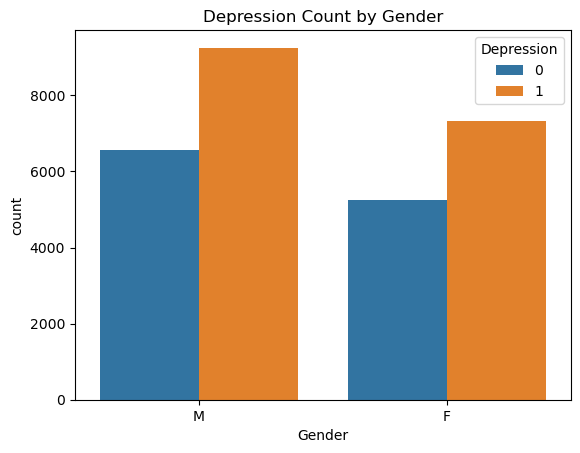

In [25]:
sns.countplot(data=df, x='Gender', hue='Depression')
plt.title("Depression Count by Gender")
plt.show()


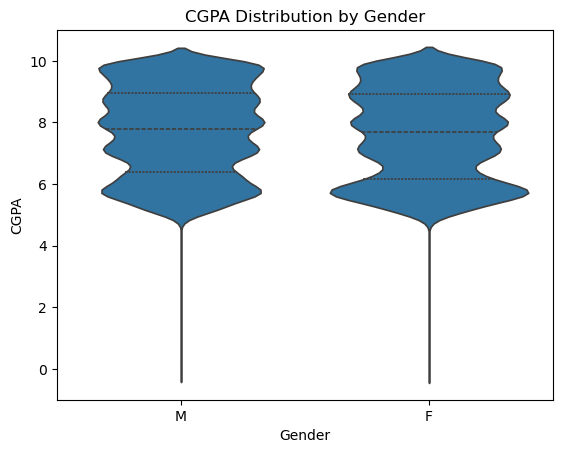

In [26]:
sns.violinplot(data=df, x='Gender', y='CGPA', inner='quartile')
plt.title("CGPA Distribution by Gender")
plt.show()
